# Airbnb Berlin Price Prediction 
---


### *Table of Contents*
- [Exploratory Data Analysis](#eda)
- [Preprocessing](#preprocessing)
- [Modeling](#modeling)

In [106]:
import pandas as pd
import numpy as np

#
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split

import os

### Import data

In [107]:
data_dir = "data"

In [108]:
trainset = pd.read_csv('data/train_airbnb_berlin.csv')
X_train = trainset.drop("Price", axis=1)
y_train = trainset["Price"]

In [109]:
X_train.columns

Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code',
       'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [110]:
sub_X = X_train[["Room Type", "Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]]

In [111]:
sub_X.head()

,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights
0,Private room,2,1.0,1.0,1.0,1,2
1,Entire home/apt,2,1.0,2.0,2.0,2,7
2,Entire home/apt,3,1.0,1.0,2.0,1,1
3,Private room,2,1.0,1.0,1.0,1,2
4,Private room,3,1.0,1.0,2.0,1,6


In [112]:
sub_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 7 columns):
Room Type          15692 non-null object
Accomodates        15692 non-null object
Bathrooms          15678 non-null object
Bedrooms           15687 non-null object
Beds               15684 non-null object
Guests Included    15692 non-null object
Min Nights         15692 non-null object
dtypes: object(7)
memory usage: 429.1+ KB


In [113]:
cpt=0
carac_spec=[];

for col in sub_X:
    for el in sub_X[col].values:
        if type(el) != str:
            cpt+=1
            carac_spec.append(el)
    print("Nombre de NaN spéciaux dans la colonne", col, ":" ,cpt)
    cpt = 0


Nombre de NaN spéciaux dans la colonne Room Type : 0
Nombre de NaN spéciaux dans la colonne Accomodates : 0
Nombre de NaN spéciaux dans la colonne Bathrooms : 14
Nombre de NaN spéciaux dans la colonne Bedrooms : 5
Nombre de NaN spéciaux dans la colonne Beds : 8
Nombre de NaN spéciaux dans la colonne Guests Included : 0
Nombre de NaN spéciaux dans la colonne Min Nights : 0


In [114]:
cpt=0
carac_spec=[];

for col in sub_X:
    for el in sub_X[col].values:
        if el == '*':
            cpt+=1
            carac_spec.append(el)
    print("Nombre de * spéciaux dans la colonne", col, ":" ,cpt)
    cpt = 0


Nombre de * spéciaux dans la colonne Room Type : 0
Nombre de * spéciaux dans la colonne Accomodates : 19
Nombre de * spéciaux dans la colonne Bathrooms : 11
Nombre de * spéciaux dans la colonne Bedrooms : 11
Nombre de * spéciaux dans la colonne Beds : 12
Nombre de * spéciaux dans la colonne Guests Included : 10
Nombre de * spéciaux dans la colonne Min Nights : 249


In [116]:
sub_X=sub_X.replace('*', np.nan);
sub_X.dropna();

In [117]:
sub_X.loc[sub_X['Accomodates'] == '*']

,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights


In [118]:
sub_X[["Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]] = sub_X[["Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]].astype(float)

In [119]:
sub_X.describe()

,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights
count,15673.000000,15667.000000,15676.00000,15672.000000,15682.000000,15443.000000
mean,2.623301,1.087732,1.14385,1.593925,1.320750,5.646247
std,1.401659,0.277762,0.61427,1.071550,0.718475,14.458952
min,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.00000,1.000000,1.000000,2.000000
50%,2.000000,1.000000,1.00000,1.000000,1.000000,3.000000
75%,3.000000,1.000000,1.00000,2.000000,1.000000,4.000000
max,16.000000,3.000000,5.00000,10.000000,8.000000,180.000000


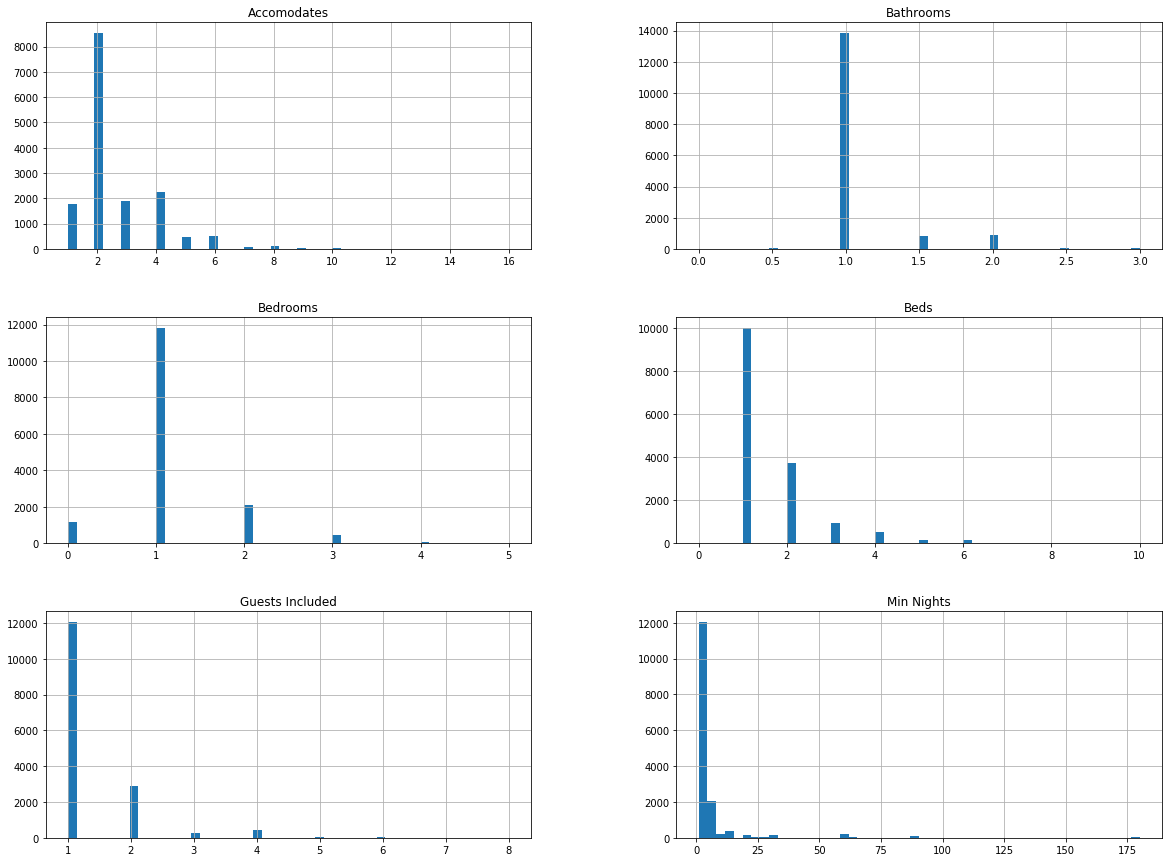

In [120]:
sub_X.hist(bins=50, figsize=(20, 15))
plt.show()

In [121]:
X_copy = sub_X.copy()
corr_matrix = sub_X.corr()

In [122]:
corr_matrix

,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights
Accomodates,1.000000,0.240741,0.615456,0.784364,0.511068,0.002251
Bathrooms,0.240741,1.000000,0.309012,0.257176,0.163744,-0.012977
Bedrooms,0.615456,0.309012,1.000000,0.600645,0.380123,0.012787
Beds,0.784364,0.257176,0.600645,1.000000,0.452978,0.014827
Guests Included,0.511068,0.163744,0.380123,0.452978,1.000000,0.008337
Min Nights,0.002251,-0.012977,0.012787,0.014827,0.008337,1.000000
